### 영화 리뷰 데이터

In [2]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [3]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(25000,) (25000,)
(25000,) (25000,)


In [5]:
# train_data의 하나(numpy)에서 10개 정도 확인해 보기 
print(type(train_data[0]),  len(train_data[0]))  # 자료형과 개수
print("하나의 리뷰 단어 개수 : ", len(train_data[0]))
train_data[0][0:15]

<class 'list'> 218
하나의 리뷰 단어 개수 :  218


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4]

In [6]:
# 5개의 긍정/부정 확인
train_labels[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [7]:
max([max(sequence) for sequence in train_data])

9999

In [8]:
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다
word_index = imdb.get_word_index()
word_index

1641221/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [9]:
# 정수 인덱스와 단어를 매핑하도록 뒤집습니다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [10]:
# reverse_word_index.get(인덱스)       # 인덱스에 해당되는 단어가 출력
# reverse_word_index.get(인덱스, '?')  # 인덱스에 해당되는 단어가 출력되는데, 단어가 없으면 ? 출력
for i in range(0, 50, 1):
    print( reverse_word_index.get(i, '?'), end= "   " )
    
print("train 데이터 첫번째 3단어 살펴보기")
print("index 14 : ", reverse_word_index.get(14-3, '?'))
print("index 22 : ", reverse_word_index.get(22-3, '?'))
print("index 16 : ", reverse_word_index.get(16-3, '?'))

?   the   and   a   of   to   is   br   in   it   i   this   that   was   as   for   with   movie   but   film   on   not   you   are   his   have   he   be   one   all   at   by   an   they   who   so   from   like   her   or   just   about   it's   out   has   if   some   there   what   good   train 데이터 첫번째 3단어 살펴보기
index 14 :  this
index 22 :  film
index 16 :  was


In [11]:
print( train_data[0]  ) # 첫번째 리뷰(숫자 인덱스

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [12]:
# [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
# 의미 : 각각의 인덱스(218)에 대한 단어를 리스트 형태로 만든다.
print("첫번째 리뷰의 인덱스를 단어로 매칭시켜서 보여준 것")
print([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
# ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
# 각각의 단어 리스트를 공백하나를 넣어주면서 하나의 문자열로 묶어 준것. 

첫번째 리뷰의 인덱스를 단어로 매칭시켜서 보여준 것
['?', 'this', 'film', 'was', 'just', 'brilliant', 'casting', 'location', 'scenery', 'story', 'direction', "everyone's", 'really', 'suited', 'the', 'part', 'they', 'played', 'and', 'you', 'could', 'just', 'imagine', 'being', 'there', 'robert', '?', 'is', 'an', 'amazing', 'actor', 'and', 'now', 'the', 'same', 'being', 'director', '?', 'father', 'came', 'from', 'the', 'same', 'scottish', 'island', 'as', 'myself', 'so', 'i', 'loved', 'the', 'fact', 'there', 'was', 'a', 'real', 'connection', 'with', 'this', 'film', 'the', 'witty', 'remarks', 'throughout', 'the', 'film', 'were', 'great', 'it', 'was', 'just', 'brilliant', 'so', 'much', 'that', 'i', 'bought', 'the', 'film', 'as', 'soon', 'as', 'it', 'was', 'released', 'for', '?', 'and', 'would', 'recommend', 'it', 'to', 'everyone', 'to', 'watch', 'and', 'the', 'fly', 'fishing', 'was', 'amazing', 'really', 'cried', 'at', 'the', 'end', 'it', 'was', 'so', 'sad', 'and', 'you', 'know', 'what', 'they', 'say', 'if', 'you'

In [13]:
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [14]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [15]:
print("변환 전 : ", train_data.shape)
X_train = vectorize_sequences(train_data)
print("변환 후 : ", X_train.shape)
X_train

변환 전 :  (25000,)
변환 후 :  (25000, 10000)


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [16]:
print("변환 전 : ",test_data.shape)
X_test = vectorize_sequences(test_data)
print("변환 후 : ",X_test.shape)
X_test

변환 전 :  (25000,)
변환 후 :  (25000, 10000)


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [17]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(type(y_train), type(y_test))
y_train.shape, y_test.shape

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


((25000,), (25000,))

### 신경망 모델 구축하기

In [42]:
from keras import models
from keras import layers

model = models.Sequential()
model.add( layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add( layers.Dense(32, activation='relu'))

model.add( layers.Dense(1, activation='sigmoid'))

### 손실함수와 최적화함수(optimizer)를 선택

In [43]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [44]:
X_val = X_train[0:10000]
partial_X_train = X_train[10000:25000] 

y_val = y_train[0:10000]
partial_y_train = y_train[10000:25000]

In [47]:
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=4,
                   batch_size=256,
                   validation_data=(X_val, y_val)
                   )
results = model.evaluate(X_test, y_test)

Epoch 1/4
59/59 [==============================] - 2s 36ms/step - loss: 0.0903 - accuracy: 0.9695 - val_loss: 0.3671 - val_accuracy: 0.8748
Epoch 2/4
59/59 [==============================] - 1s 24ms/step - loss: 0.0601 - accuracy: 0.9813 - val_loss: 0.4012 - val_accuracy: 0.8772
Epoch 3/4
59/59 [==============================] - 1s 23ms/step - loss: 0.0431 - accuracy: 0.9865 - val_loss: 0.4583 - val_accuracy: 0.8732
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.5656 - accuracy: 0.8588


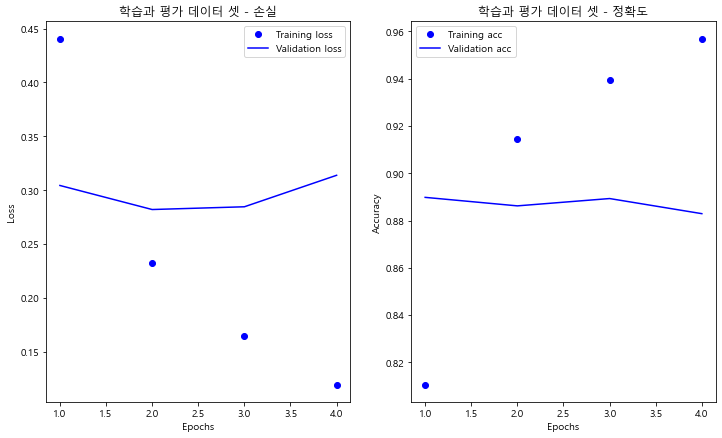

In [46]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
# 'bo'는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# 'b'는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('학습과 평가 데이터 셋 - 손실')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('학습과 평가 데이터 셋 - 정확도')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()